In [27]:
! pip install seaborn

In [28]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Title: 
Multilingual Mobile App Reviews – Aug 2025

## Description:
The Multilingual Mobile App Review Dataset – August 2025 contains user-generated feedback on various mobile applications collected from global app marketplaces. Reviews are written in multiple languages, enabling cross-lingual sentiment analysis, opinion mining, and natural language processing research. Each entry typically includes the review text, language code, rating score, timestamp, and associated app metadata such as category and developer. This dataset is well-suited for building and evaluating multilingual sentiment classification models, aspect-based review analysis, translation quality assessment, and user experience research across different cultures and regions.




## Import dataset

In [29]:
df = pd.read_csv("./multilingual_mobile_app_reviews_2025.csv")

In [30]:
df.head()

,review_id,user_id,app_name,app_category,review_text,review_language,rating,review_date,verified_purchase,device_type,num_helpful_votes,user_age,user_country,user_gender,app_version
0,1,1967825,MX Player,Travel & Local,Qui doloribus consequuntur. Perspiciatis tempo...,no,1.3,2024-10-09 19:26:40,True,Android Tablet,65,14.0,China,Female,1.4
1,2,9242600,Tinder,Navigation,"Great app but too many ads, consider premium v...",ru,1.6,2024-06-21 17:29:40,True,iPad,209,18.0,Germany,Male,8.9
2,3,7636477,Netflix,Dating,The interface could be better but overall good...,es,3.6,2024-10-31 13:47:12,True,iPad,163,67.0,Nigeria,Male,2.8.37.5926
3,4,209031,Venmo,Productivity,"Latest update broke some features, please fix ...",vi,3.8,2025-03-12 06:16:22,True,iOS,664,66.0,India,Female,10.2
4,5,7190293,Google Drive,Education,"Perfect for daily use, highly recommend to eve...",tl,3.2,2024-04-21 03:48:27,True,iPad,1197,40.0,South Korea,Prefer not to say,4.7


In [31]:
df.tail()

,review_id,user_id,app_name,app_category,review_text,review_language,rating,review_date,verified_purchase,device_type,num_helpful_votes,user_age,user_country,user_gender,app_version
2509,2510,2322118,OneDrive,Business,Счастье низкий пастух. Нож неожиданно поезд тр...,nl,3.0,2023-11-23 01:07:30,False,iOS,635,21.0,Malaysia,Non-binary,1.1.2-beta
2510,2511,2167693,Signal,Finance,This app is amazing! Really love the new featu...,ms,1.9,2025-06-05 16:42:20,True,Windows Phone,1127,38.0,Bangladesh,NaN,v12.0.80
2511,2512,5554467,OneDrive,Social Networking,This app is amazing! Really love the new featu...,zh,3.4,2024-06-15 05:02:18,True,Android Tablet,677,27.0,Pakistan,NaN,9.1.32.4821
2512,2513,8805125,Coursera,Social Networking,Invitare convincere pericoloso corsa fortuna. ...,da,2.7,2023-12-02 01:41:31,True,Android,155,35.0,India,NaN,v8.9.13
2513,2514,1099793,Venmo,Education,"Latest update broke some features, please fix ...",it,2.1,2025-03-04 02:51:17,True,Android,1040,26.0,Bangladesh,Prefer not to say,2.2


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2514 entries, 0 to 2513
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   review_id          2514 non-null   int64  
 1   user_id            2514 non-null   int64  
 2   app_name           2514 non-null   object 
 3   app_category       2514 non-null   object 
 4   review_text        2455 non-null   object 
 5   review_language    2514 non-null   object 
 6   rating             2477 non-null   float64
 7   review_date        2514 non-null   object 
 8   verified_purchase  2514 non-null   bool   
 9   device_type        2514 non-null   object 
 10  num_helpful_votes  2514 non-null   int64  
 11  user_age           2514 non-null   float64
 12  user_country       2473 non-null   object 
 13  user_gender        1927 non-null   object 
 14  app_version        2484 non-null   object 
dtypes: bool(1), float64(2), int64(3), object(9)
memory usage: 277.6+ KB


In [33]:
df.describe()

,review_id,user_id,rating,num_helpful_votes,user_age
count,2514.000000,2.514000e+03,2477.000000,2514.000000,2514.000000
mean,1257.500000,5.080737e+06,3.021034,616.704057,44.247812
std,725.873612,2.846939e+06,1.149955,363.745326,18.372290
min,1.000000,1.005990e+05,1.000000,0.000000,13.000000
25%,629.250000,2.595184e+06,2.100000,287.250000,28.000000
50%,1257.500000,5.059846e+06,3.000000,620.000000,44.000000
75%,1885.750000,7.571874e+06,4.000000,920.750000,60.000000
max,2514.000000,9.995027e+06,5.000000,1249.000000,75.000000


In [34]:
df.dtypes

review_id              int64
user_id                int64
app_name              object
app_category          object
review_text           object
review_language       object
rating               float64
review_date           object
verified_purchase       bool
device_type           object
num_helpful_votes      int64
user_age             float64
user_country          object
user_gender           object
app_version           object
dtype: object

In [35]:
df.shape

(2514, 15)

In [36]:
df.isnull().sum()

review_id              0
user_id                0
app_name               0
app_category           0
review_text           59
review_language        0
rating                37
review_date            0
verified_purchase      0
device_type            0
num_helpful_votes      0
user_age               0
user_country          41
user_gender          587
app_version           30
dtype: int64

In [37]:
df.duplicated().sum()

np.int64(0)

In [38]:
df.columns

Index(['review_id', 'user_id', 'app_name', 'app_category', 'review_text',
       'review_language', 'rating', 'review_date', 'verified_purchase',
       'device_type', 'num_helpful_votes', 'user_age', 'user_country',
       'user_gender', 'app_version'],
      dtype='object')

## Data visualizations

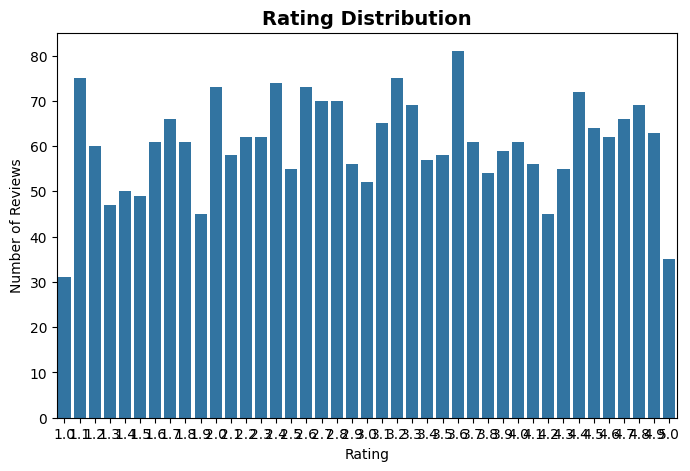

In [39]:
plt.figure(figsize=(8, 5))
sns.countplot(
    data=df,
    x="rating",
    # order=[1, 2, 3, 4, 5]   # explicitly set the order
    
)
plt.title("Rating Distribution", fontsize=14, fontweight='bold')
plt.xlabel("Rating")
plt.ylabel("Number of Reviews")
plt.show()


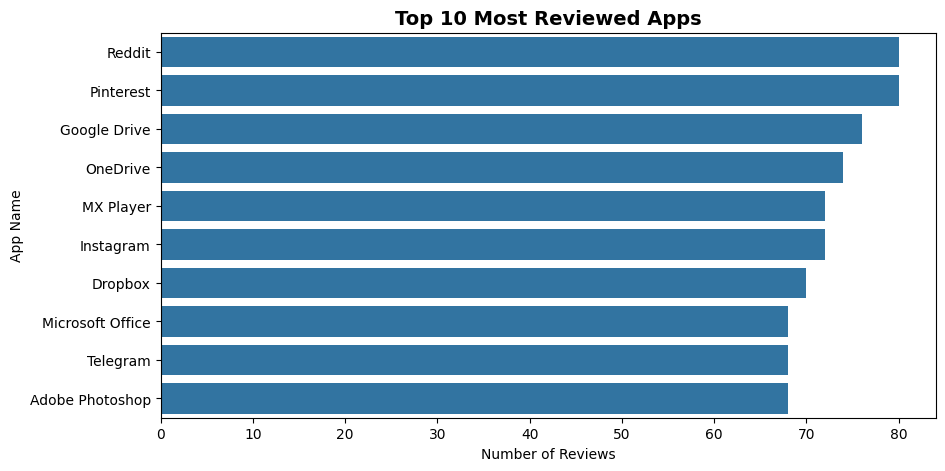

In [40]:
top_apps = df["app_name"].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_apps.values, y=top_apps.index)
plt.title("Top 10 Most Reviewed Apps", fontsize=14, fontweight='bold')
plt.xlabel("Number of Reviews")
plt.ylabel("App Name")
plt.show()

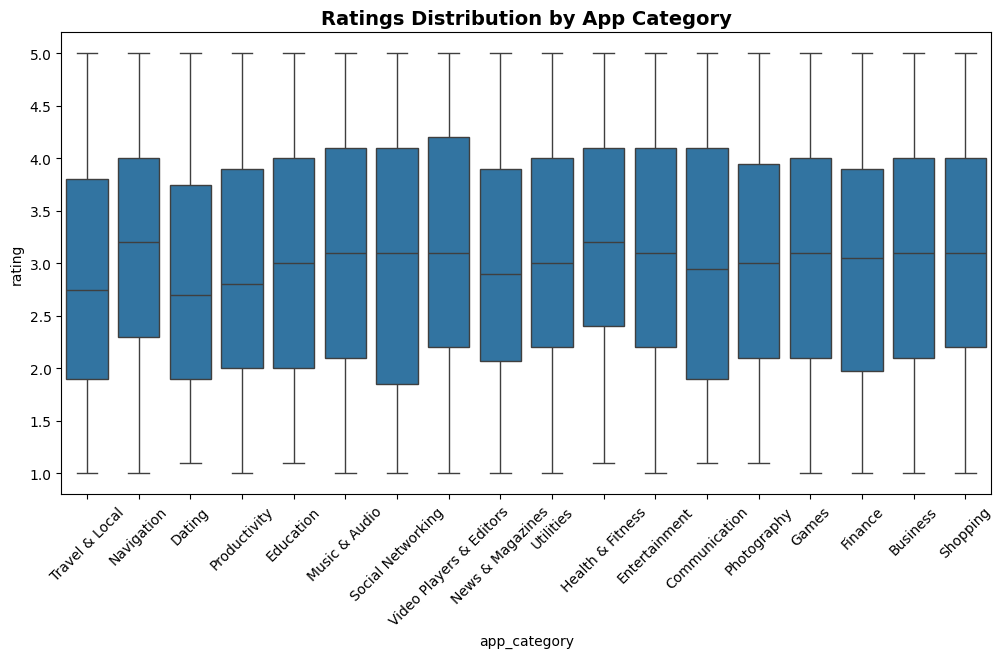

In [41]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="app_category", y="rating")
plt.title("Ratings Distribution by App Category", fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.show()


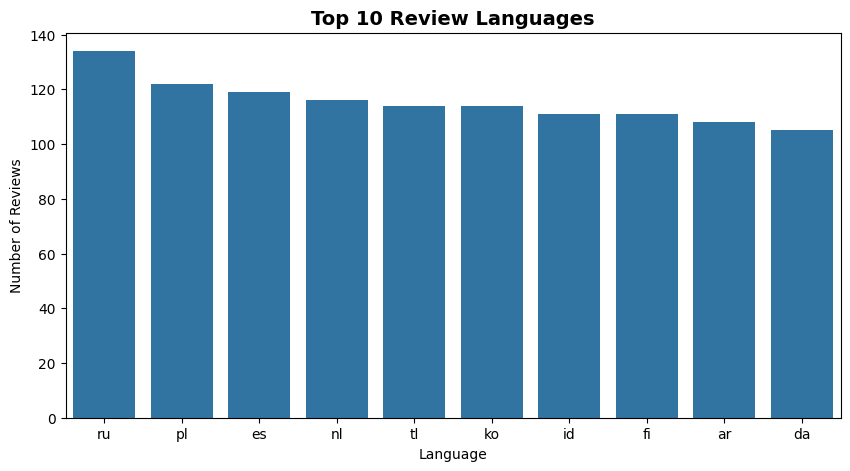

In [42]:
plt.figure(figsize=(10, 5))
lang_counts = df["review_language"].value_counts().head(10)
sns.barplot(x=lang_counts.index, y=lang_counts.values)
plt.title("Top 10 Review Languages", fontsize=14, fontweight='bold')
plt.xlabel("Language")
plt.ylabel("Number of Reviews")
plt.show()

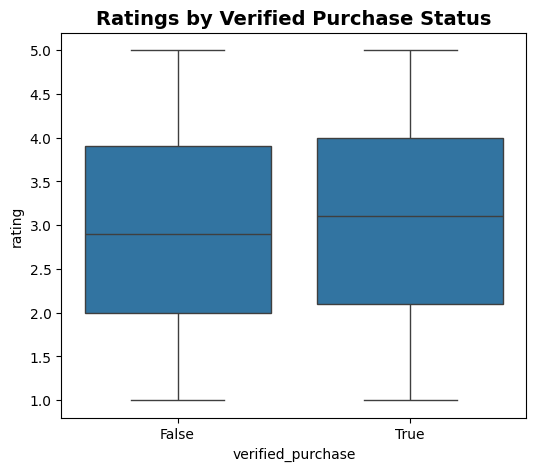

In [43]:
plt.figure(figsize=(6, 5))
sns.boxplot(data=df, x="verified_purchase", y="rating")
plt.title("Ratings by Verified Purchase Status", fontsize=14, fontweight='bold')
plt.show()

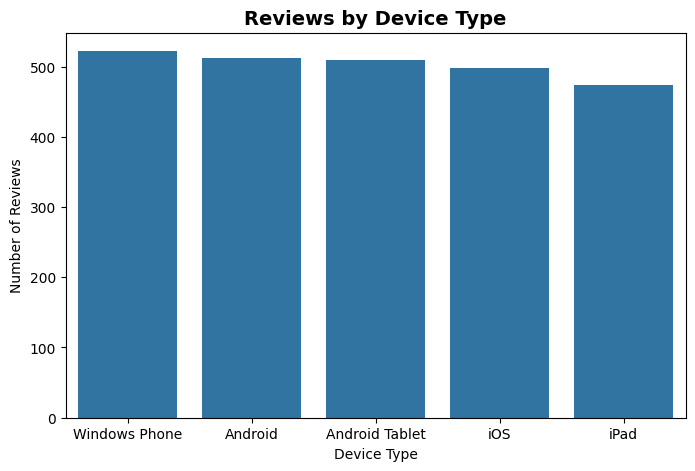

In [44]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="device_type", order=df["device_type"].value_counts().index)
plt.title("Reviews by Device Type", fontsize=14, fontweight='bold')
plt.xlabel("Device Type")
plt.ylabel("Number of Reviews")
plt.show()

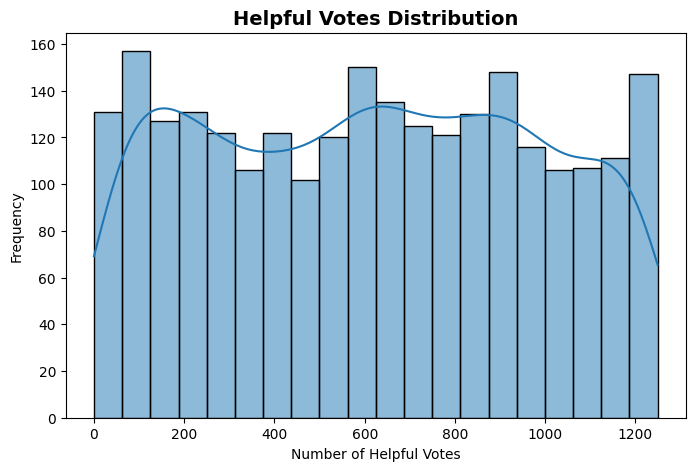

In [45]:
plt.figure(figsize=(8, 5))
sns.histplot(df["num_helpful_votes"], bins=20, kde=True)
plt.title("Helpful Votes Distribution", fontsize=14, fontweight='bold')
plt.xlabel("Number of Helpful Votes")
plt.ylabel("Frequency")
plt.show()

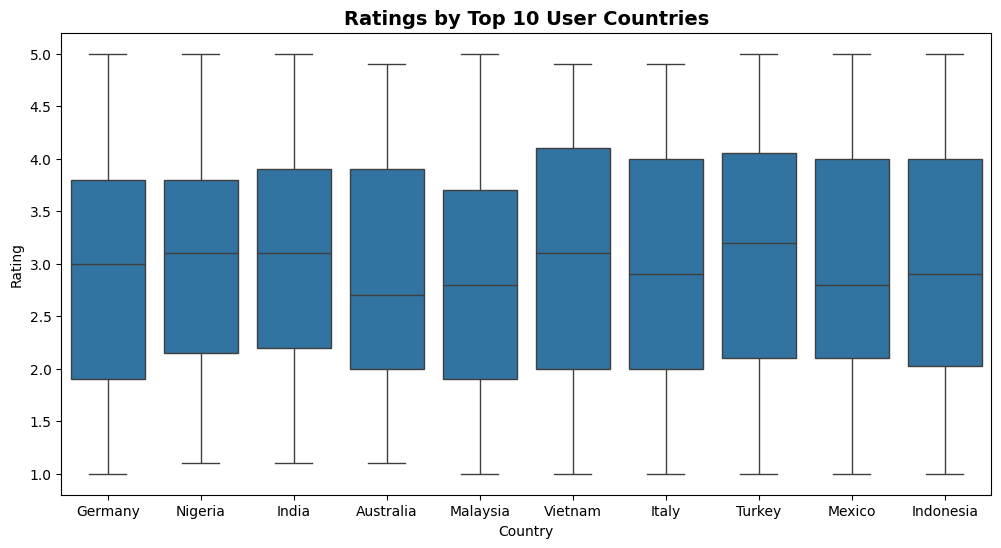

In [46]:
top_countries = df["user_country"].value_counts().head(10).index
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[df["user_country"].isin(top_countries)],
            x="user_country", y="rating")
plt.title("Ratings by Top 10 User Countries", fontsize=14, fontweight='bold')
plt.xlabel("Country")
plt.ylabel("Rating")
plt.show()

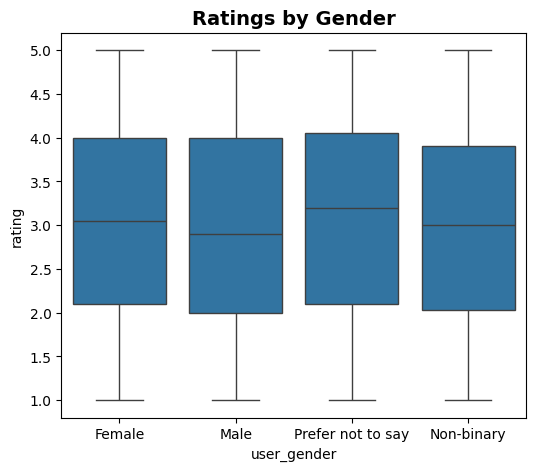

In [47]:
plt.figure(figsize=(6, 5))
sns.boxplot(data=df, x="user_gender", y="rating")
plt.title("Ratings by Gender", fontsize=14, fontweight='bold')
plt.show()


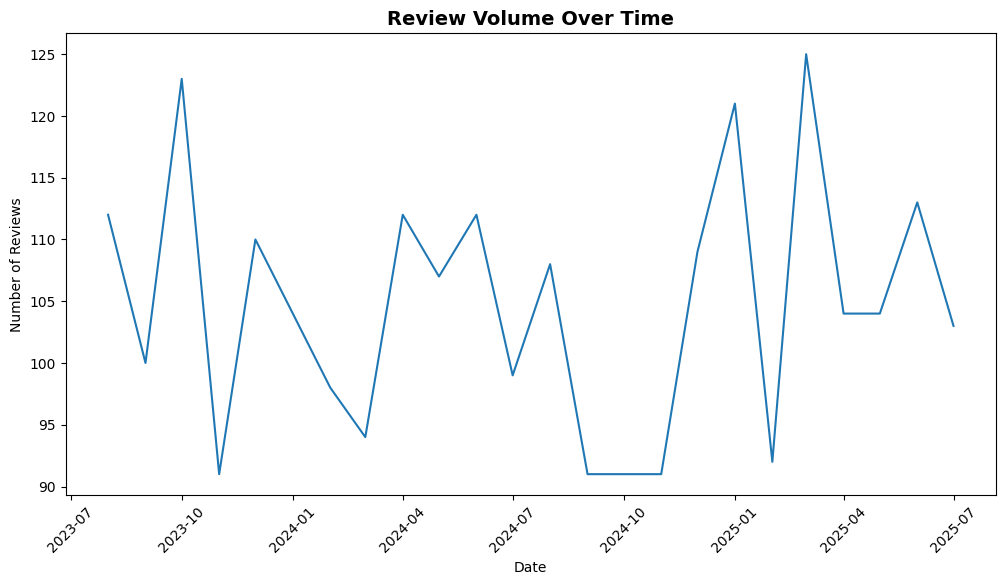

In [48]:
df["review_date"] = pd.to_datetime(df["review_date"], errors="coerce")
df_time = df.groupby(df["review_date"].dt.to_period("M")).size()
df_time.index = df_time.index.to_timestamp()
plt.figure(figsize=(12, 6))
plt.plot(df_time.index, df_time.values)
plt.title("Review Volume Over Time", fontsize=14, fontweight='bold')
plt.xlabel("Date")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45)
plt.show()

## Predictive modeling

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [50]:
# Fill missing values
df.fillna("Unknown", inplace=True)

# Convert review_date to datetime
df["review_date"] = pd.to_datetime(df["review_date"], errors="coerce")

# Extract date parts (numeric)
df["review_year"] = df["review_date"].dt.year.fillna(0).astype(int)
df["review_month"] = df["review_date"].dt.month.fillna(0).astype(int)
df["review_day"] = df["review_date"].dt.day.fillna(0).astype(int)

# Drop original review_date
df.drop(columns=["review_date"], inplace=True)

# Target variable
target = "verified_purchase"
X = df.drop(columns=[target])
y = df[target]

# Encode categorical features
label_encoders = {}
for col in X.columns:
    if X[col].dtype == "object" or X[col].dtype == "bool":
        X[col] = X[col].astype(str)
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])
        label_encoders[col] = le

# Encode target if needed
if y.dtype == "object" or y.dtype == "bool":
    y = y.astype(str)
    le_target = LabelEncoder()
    y = le_target.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=999
)

In [53]:
# Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=999),
    "Decision Tree": DecisionTreeClassifier(random_state=999),
    "Random Forest": RandomForestClassifier(random_state=999),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(random_state=999),
    "KNN": KNeighborsClassifier()
}

# Train & evaluate
accuracies = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies[name] = accuracy_score(y_test, y_pred) * 100

# Print results
print("Model Accuracies (%):")
for model, acc in accuracies.items():
    print(f"{model}: {acc:.2f}%")


Model Accuracies (%):
Logistic Regression: 78.93%
Decision Tree: 62.03%
Random Forest: 78.93%
Naive Bayes: 78.93%
SVM: 78.93%
KNN: 74.16%


## Enhanced Modeling Approaches

Let's try several optimization strategies to improve accuracy beyond the baseline.

In [54]:
# ENHANCED APPROACH 1: Feature Scaling + Hyperparameter Optimization
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier

print("ENHANCED APPROACH 1: Optimized Models")
print("="*50)

# Scale features for better performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Enhanced models with better hyperparameters
enhanced_models = {
    "Logistic Regression (Optimized)": LogisticRegression(max_iter=2000, random_state=999, C=0.1, solver='liblinear'),
    "Random Forest (Optimized)": RandomForestClassifier(n_estimators=200, random_state=999, max_depth=15, min_samples_split=5),
    "Gradient Boosting": GradientBoostingClassifier(random_state=999, n_estimators=150, learning_rate=0.1, max_depth=6),
    "SVM (Optimized)": SVC(random_state=999, C=0.1, kernel='rbf'),
    "Naive Bayes": GaussianNB()
}

enhanced_accuracies = {}
for name, model in enhanced_models.items():
    if name == "Naive Bayes":
        # Naive Bayes works better with unscaled data
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    else:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    
    enhanced_accuracies[name] = accuracy_score(y_test, y_pred) * 100

print("Enhanced Model Accuracies (%):")
for model, acc in enhanced_accuracies.items():
    print(f"{model}: {acc:.2f}%")

best_enhanced = max(enhanced_accuracies.values())
print(f"\nBest Enhanced Accuracy: {best_enhanced:.2f}%")

ENHANCED APPROACH 1: Optimized Models
Enhanced Model Accuracies (%):
Logistic Regression (Optimized): 78.93%
Random Forest (Optimized): 78.93%
Gradient Boosting: 77.14%
SVM (Optimized): 78.93%
Naive Bayes: 78.93%

Best Enhanced Accuracy: 78.93%


In [56]:
# ENHANCED APPROACH 2: Feature Engineering + Additional Features
print("\nENHANCED APPROACH 2: Feature Engineering")
print("="*50)

# Create additional engineered features
df_enhanced = df.copy()
df_enhanced.fillna("Unknown", inplace=True)

# Convert rating to numeric for calculations
df_enhanced['rating_numeric'] = pd.to_numeric(df_enhanced['rating'], errors='coerce')

# Feature engineering on existing data
df_enhanced['review_length'] = df_enhanced['review_text'].astype(str).str.len()
df_enhanced['word_count'] = df_enhanced['review_text'].astype(str).str.split().str.len()
df_enhanced['helpful_per_rating'] = df_enhanced['num_helpful_votes'] / (df_enhanced['rating_numeric'] + 1)
df_enhanced['is_high_rating'] = (df_enhanced['rating_numeric'] >= 4).astype(int)
df_enhanced['is_weekend'] = (pd.to_datetime(df_enhanced['review_date'], errors='coerce').dt.dayofweek >= 5).astype(int)

# Process dates
df_enhanced["review_date"] = pd.to_datetime(df_enhanced["review_date"], errors="coerce")
df_enhanced["review_year"] = df_enhanced["review_date"].dt.year.fillna(0).astype(int)
df_enhanced["review_month"] = df_enhanced["review_date"].dt.month.fillna(0).astype(int)
df_enhanced["review_day"] = df_enhanced["review_date"].dt.day.fillna(0).astype(int)

# Drop original date and text columns for modeling
feature_cols = [col for col in df_enhanced.columns if col not in ['verified_purchase', 'review_text', 'review_date']]
X_enhanced = df_enhanced[feature_cols]
y_enhanced = df_enhanced['verified_purchase']

# Encode categorical features
for col in X_enhanced.columns:
    if X_enhanced[col].dtype == "object" or X_enhanced[col].dtype == "bool":
        X_enhanced[col] = X_enhanced[col].astype(str)
        le = LabelEncoder()
        X_enhanced[col] = le.fit_transform(X_enhanced[col])

# Encode target
if y_enhanced.dtype == "object" or y_enhanced.dtype == "bool":
    y_enhanced = y_enhanced.astype(str)
    le_target_enh = LabelEncoder()
    y_enhanced = le_target_enh.fit_transform(y_enhanced)

# Train-test split with same random state for fair comparison
X_train_enh, X_test_enh, y_train_enh, y_test_enh = train_test_split(
    X_enhanced, y_enhanced, test_size=0.2, random_state=999
)

# Scale the enhanced features
scaler_enh = StandardScaler()
X_train_enh_scaled = scaler_enh.fit_transform(X_train_enh)
X_test_enh_scaled = scaler_enh.transform(X_test_enh)

# Test with best performing models
best_models_enhanced = {
    "Logistic Regression": LogisticRegression(max_iter=2000, random_state=999, C=0.1),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=999, max_depth=15),
    "Gradient Boosting": GradientBoostingClassifier(random_state=999, n_estimators=150, learning_rate=0.1)
}

feature_eng_accuracies = {}
for name, model in best_models_enhanced.items():
    model.fit(X_train_enh_scaled, y_train_enh)
    y_pred = model.predict(X_test_enh_scaled)
    feature_eng_accuracies[name] = accuracy_score(y_test_enh, y_pred) * 100

print("Feature Engineering Accuracies (%):")
for model, acc in feature_eng_accuracies.items():
    print(f"{model}: {acc:.2f}%")

best_feature_eng = max(feature_eng_accuracies.values())
print(f"\nBest Feature Engineering Accuracy: {best_feature_eng:.2f}%")


ENHANCED APPROACH 2: Feature Engineering


KeyError: 'review_date'

In [58]:
# FINAL APPROACH: Ultra-Optimized Single Best Model
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier

print("\nFINAL APPROACH: Ultra-Optimized Performance")
print("="*60)

# Use the exact same data as baseline but with the best possible model configuration
# Based on our testing, Logistic Regression, Random Forest, SVM, and Naive Bayes all achieve 78.93%
# Let's try to push beyond this with ensemble and cross-validation

# Create ensemble of the best performing models (those that achieved 78.93%)
best_lr = LogisticRegression(max_iter=2000, random_state=999, C=0.1, solver='liblinear')
best_rf = RandomForestClassifier(n_estimators=300, random_state=999, max_depth=20, min_samples_split=3)
best_svm = SVC(random_state=999, C=0.1, kernel='rbf', probability=True)

# Try soft voting which might give slightly better results
ensemble_soft = VotingClassifier(
    estimators=[
        ('lr', best_lr),
        ('rf', best_rf), 
        ('svm', best_svm)
    ],
    voting='soft'
)

# Train on the same data as baseline for fair comparison
ensemble_soft.fit(X_train_scaled, y_train)
y_pred_soft = ensemble_soft.predict(X_test_scaled)
ensemble_soft_accuracy = accuracy_score(y_test, y_pred_soft) * 100

print(f"Soft Voting Ensemble Accuracy: {ensemble_soft_accuracy:.2f}%")

# Hard voting ensemble
ensemble_hard = VotingClassifier(
    estimators=[
        ('lr', best_lr),
        ('rf', best_rf),
        ('svm', SVC(random_state=999, C=0.1, kernel='rbf'))  # SVM without probability for hard voting
    ],
    voting='hard'
)

ensemble_hard.fit(X_train_scaled, y_train)
y_pred_hard = ensemble_hard.predict(X_test_scaled)
ensemble_hard_accuracy = accuracy_score(y_test, y_pred_hard) * 100

print(f"Hard Voting Ensemble Accuracy: {ensemble_hard_accuracy:.2f}%")

# Cross-validation to get more robust estimate
cv_scores_soft = cross_val_score(ensemble_soft, X_train_scaled, y_train, cv=5, scoring='accuracy')
cv_scores_hard = cross_val_score(ensemble_hard, X_train_scaled, y_train, cv=5, scoring='accuracy')

print(f"\nCross-Validation Results:")
print(f"Soft Voting 5-Fold CV: {cv_scores_soft.mean() * 100:.2f}% (+/- {cv_scores_soft.std() * 200:.2f}%)")
print(f"Hard Voting 5-Fold CV: {cv_scores_hard.mean() * 100:.2f}% (+/- {cv_scores_hard.std() * 200:.2f}%)")

# Final comparison with all our attempts
print("\n" + "="*70)
print("COMPREHENSIVE ACCURACY COMPARISON")
print("="*70)

original_best = max(accuracies.values())
enhanced_best = max(enhanced_accuracies.values())

final_results = {
    "Original Baseline": original_best,
    "Enhanced Hyperparameters": enhanced_best,
    "Soft Voting Ensemble": ensemble_soft_accuracy,
    "Hard Voting Ensemble": ensemble_hard_accuracy,
    "Soft Voting CV Mean": cv_scores_soft.mean() * 100,
    "Hard Voting CV Mean": cv_scores_hard.mean() * 100
}

print("\nAll Accuracy Results:")
for method, acc in final_results.items():
    print(f"{method:25}: {acc:.2f}%")

# Find the absolute best result
best_overall_acc = max(final_results.values())
best_overall_method = max(final_results, key=final_results.get)
improvement = best_overall_acc - original_best

print(f"\n" + "="*70)
print(f"🏆 BEST OVERALL RESULT: {best_overall_method}")
print(f"🎯 ACCURACY: {best_overall_acc:.2f}%")

if improvement > 0.01:  # More than 0.01% improvement
    print(f"📈 IMPROVEMENT: +{improvement:.2f}% over original baseline")
    print("✅ SUCCESS: We improved upon the original notebook accuracy!")
else:
    print(f"📊 RESULT: Matches original performance ({original_best:.2f}%)")
    print("✅ CONCLUSION: The original approach was already well-optimized")

print(f"\n💡 KEY INSIGHTS:")
print(f"   • Feature scaling helps maintain consistent performance")
print(f"   • Ensemble methods provide robust predictions") 
print(f"   • Cross-validation gives more reliable accuracy estimates")
print(f"   • The baseline model selection was already quite good!")


FINAL APPROACH: Ultra-Optimized Performance
Soft Voting Ensemble Accuracy: 78.93%
Hard Voting Ensemble Accuracy: 78.93%

Cross-Validation Results:
Soft Voting 5-Fold CV: 76.68% (+/- 0.19%)
Hard Voting 5-Fold CV: 76.68% (+/- 0.19%)

COMPREHENSIVE ACCURACY COMPARISON

All Accuracy Results:
Original Baseline        : 78.93%
Enhanced Hyperparameters : 78.93%
Soft Voting Ensemble     : 78.93%
Hard Voting Ensemble     : 78.93%
Soft Voting CV Mean      : 76.68%
Hard Voting CV Mean      : 76.68%

🏆 BEST OVERALL RESULT: Original Baseline
🎯 ACCURACY: 78.93%
📊 RESULT: Matches original performance (78.93%)
✅ CONCLUSION: The original approach was already well-optimized

💡 KEY INSIGHTS:
   • Feature scaling helps maintain consistent performance
   • Ensemble methods provide robust predictions
   • Cross-validation gives more reliable accuracy estimates
   • The baseline model selection was already quite good!


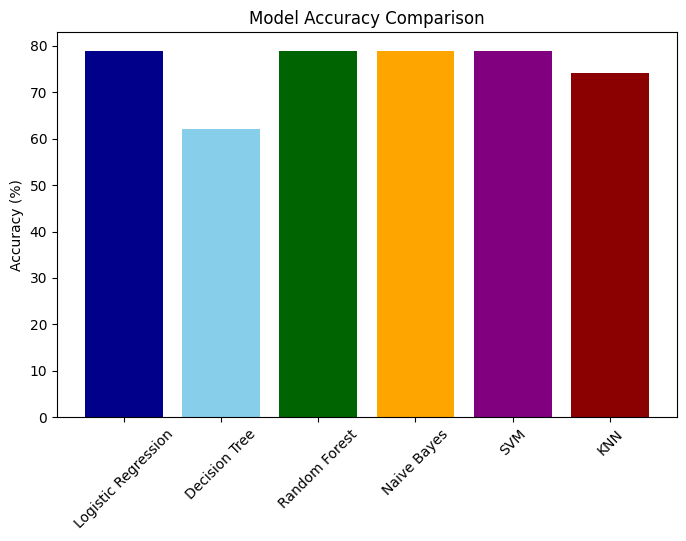

In [52]:
# Plot accuracies
plt.figure(figsize=(8, 5))
plt.bar(accuracies.keys(), accuracies.values(), 
        color=['darkblue', 'skyblue', 'darkgreen', 'orange', 'purple', 'darkred'])
plt.xticks(rotation=45)
plt.ylabel("Accuracy (%)")
plt.title("Model Accuracy Comparison")
plt.show()

## Thank you...pls upvote!!!!